In [1]:
import get_data
import generate_signals
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 60
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(30, 7)
import seaborn as sns
import itertools
import datetime
import result_analysis

In [2]:
period=[8,16,32,24,48,96]

In [3]:
G10_daily_category=['DEXUSAL','DEXCAUS','DEXSZUS','DEXUSUK','DEXJPUS','DEXNOUS','DEXUSNZ','DEXSDUS']

In [4]:
G10_daily = get_data.currency()
print(G10_daily.get_all_symbols())

data_dict=G10_daily.get_currency(G10_daily_category)

Try to get your own key, though you can use my key:)

['DEXUSAL', 'DEXCAUS', 'DEXSZUS', 'DEXUSUK', 'DEXJPUS', 'DEXNOUS', 'DEXUSNZ', 'DEXSDUS', 'DTWEXM', 'DTWEXB', 'DEXUSEU', 'DEXCHUS', 'DEXMXUS', 'DEXBZUS', 'DEXKOUS', 'DEXINUS', 'DEXVZUS', 'DEXMAUS', 'DEXTHUS', 'DEXSFUSDEXTAUS', 'DEXHKUS', 'DEXSIUS', 'DEXSLUS']
The currency you are downloading are ['DEXUSAL', 'DEXCAUS', 'DEXSZUS', 'DEXUSUK', 'DEXJPUS', 'DEXNOUS', 'DEXUSNZ', 'DEXSDUS']


In [5]:
import pickle
file = open('G10_currency', 'wb')
pickle.dump(data_dict, file)
file.close()

In [6]:
for i in range(len(G10_daily_category)):
    index=G10_daily_category[i]
    data_dict[index].value.fillna(method='pad',inplace=True)
    #del duplicate data
    dup=data_dict[index].duplicated('date')
    data_dict[index]=data_dict[index][~dup]
    #use USD as basic currency
    if i in [0,3,5,8]:
        data_dict[index].value=1/data_dict[index].value

#if date is all the same
for j,k in itertools.combinations(range(len(G10_daily_category)),2):
    if(sum(data_dict[G10_daily_category[j]].date!=\
              data_dict[G10_daily_category[k]].date)>0):
        print('Dates of dataset '+G10_daily_category[j]+' and '+\
              G10_daily_category[k]+' are different')
date=data_dict[list(data_dict.keys())[0]].date

In [11]:
data_df=pd.DataFrame()
for i in range(len(G10_daily_category)):
    index=G10_daily_category[i]
    data_df[index]=data_dict[index].value
data_df.index=data_dict[index].date

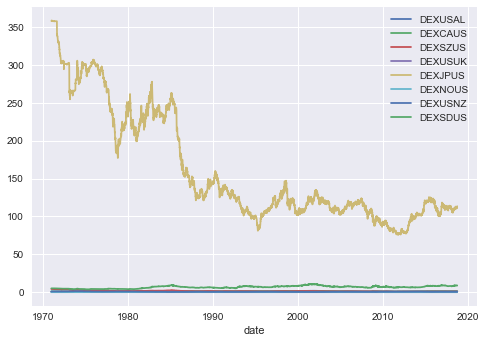

In [12]:
data_df.plot()

In [7]:
signal_class=generate_signals.signal_1(data_dict,period)

In [8]:
signal_class.get_signal()

In [9]:
signal_df=signal_class.signal_df

In [10]:
price_df=pd.DataFrame()
for index in G10_daily_category:
    price_df[index]=data_dict[index].value
price_df.set_index(date,inplace=True)
price_df=price_df.loc[signal_df.index]

<strong>Time Series Portfolio</strong>

In [13]:
#TS
position=signal_df/8    
#weight=price_df.apply(lambda x:x/np.sum(x),axis=1)
return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)

In [14]:
re_a1=result_analysis.result_daily(daily_re)
re_a1.get_metrics()
print(re_a1.ar,re_a1.std,re_a1.sp,re_a1.mdd)

0.0393005371035 0.0430328062819 0.533996275946 -0.474541505546


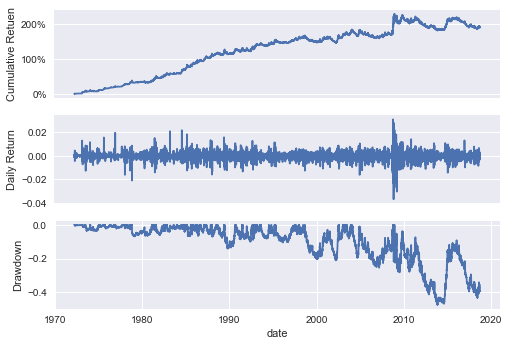

In [15]:
re_a1.figure_plot()

<strong>Cross-sectional Portfolio</strong>

In [16]:
signal_L3=signal_df.apply(lambda x: x.where(x<x.nlargest(3)[2],60),axis=1)
signal_S3=signal_L3.apply(lambda x: x.where(x>x.nsmallest(3)[2],-60),axis=1)
signal_else=signal_S3.apply(lambda x:x.where(np.abs(x)>1,0),axis=1)
position=signal_else/360

return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)
daily_cum_re=(daily_re+1).cumprod()-1

In [17]:
re_a2=result_analysis.result_daily(daily_re)
re_a2.get_metrics()
print(re_a2.ar,re_a2.std,re_a2.sp,re_a2.mdd)

0.0649638399092 0.0605092712298 0.516758600066 -1.33474891703


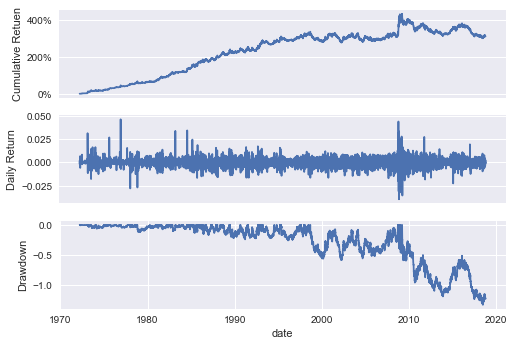

In [18]:
re_a2.figure_plot()

<h3>Emerging Market Currencies</h3>

In [19]:
EMC_daily_category=['DEXMXUS','DEXBZUS','DEXKOUS','DEXINUS','DEXTHUS','DEXSFUS','DEXTAUS']

In [20]:
EMC_daily = get_data.currency()
data_dict=EMC_daily.get_currency(EMC_daily_category)

Try to get your own key, though you can use my key:)

The currency you are downloading are ['DEXMXUS', 'DEXBZUS', 'DEXKOUS', 'DEXINUS', 'DEXTHUS', 'DEXSFUS', 'DEXTAUS']


In [21]:
for i in data_dict.keys():
    print(i,len(data_dict[i]))
    print(data_dict[i].iloc[0,0],data_dict[i].iloc[-1,0])

DEXMXUS 6497
1993-11-08 00:00:00 2018-09-28 00:00:00
DEXBZUS 6198
1995-01-02 00:00:00 2018-09-28 00:00:00
DEXKOUS 9781
1981-04-13 00:00:00 2018-09-28 00:00:00
DEXINUS 11936
1973-01-02 00:00:00 2018-09-28 00:00:00
DEXTHUS 9852
1981-01-02 00:00:00 2018-09-28 00:00:00
DEXSFUS 15931
1971-01-04 00:00:00 2018-09-28 00:00:00
DEXTAUS 9139
1983-10-03 00:00:00 2018-09-28 00:00:00


In [22]:
start_date=data_dict['DEXBZUS'].iloc[0,0]

In [23]:
for i in data_dict.keys():
    data_dict[i]=data_dict[i][data_dict[i].date>start_date]

In [24]:
for i in range(len(EMC_daily_category)):
    index=EMC_daily_category[i]
    data_dict[index].value.fillna(method='pad',inplace=True)
    #del duplicate data
    dup=data_dict[index].duplicated('date')
    data_dict[index]=data_dict[index][~dup]
    data_dict[index].reset_index(drop=True,inplace=True)

In [25]:
#if date is all the same
for j,k in itertools.combinations(range(len(EMC_daily_category)),2):
    if(sum(data_dict[EMC_daily_category[j]].date!=\
              data_dict[EMC_daily_category[k]].date)>0):
        print('Dates of dataset '+EMC_daily_category[j]+' and '+\
              EMC_daily_category[k]+' are different')
date=data_dict[list(data_dict.keys())[0]].date

In [26]:
data_df=pd.DataFrame()
for i in range(len(EMC_daily_category)):
    index=EMC_daily_category[i]
    data_df[index]=data_dict[index].value
data_df.index=data_dict[index].date

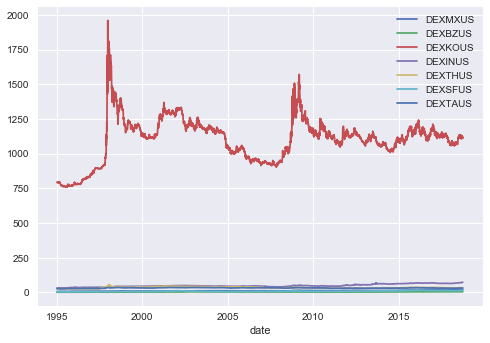

In [27]:
data_df.plot()

In [28]:
signal_class=generate_signals.signal_1(data_dict,period)

In [29]:
signal_class.get_signal()

In [30]:
signal_df=signal_class.signal_df

In [31]:
price_df=pd.DataFrame()
for index in EMC_daily_category:
    price_df[index]=data_dict[index].value
price_df.set_index(date,inplace=True)
price_df=price_df.loc[signal_df.index]

In [32]:
#TS
position=signal_df/7    
#weight=price_df.apply(lambda x:x/np.sum(x),axis=1)
return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)

In [33]:
re_a3=result_analysis.result_daily(daily_re)
re_a3.get_metrics()
print(re_a3.ar,re_a3.std,re_a3.sp,re_a3.mdd)

0.0367220644108 0.0410098091416 0.667278329883 -0.135173924298


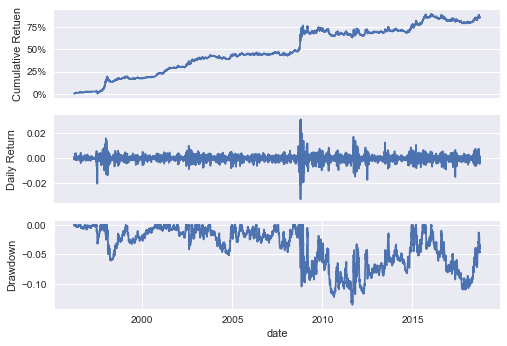

In [34]:
re_a3.figure_plot()

In [35]:
signal_L3=signal_df.apply(lambda x: x.where(x<x.nlargest(3)[2],60),axis=1)
signal_S3=signal_L3.apply(lambda x: x.where(x>x.nsmallest(3)[2],-60),axis=1)
signal_else=signal_S3.apply(lambda x:x.where(np.abs(x)>1,0),axis=1)
position=signal_else/360

return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)
daily_cum_re=(daily_re+1).cumprod()-1

In [36]:
re_a4=result_analysis.result_daily(daily_re)
re_a4.get_metrics()
print(re_a4.ar,re_a4.std,re_a4.sp,re_a4.mdd)

0.0119968597651 0.0434635263573 0.265106717365 -0.219670361427


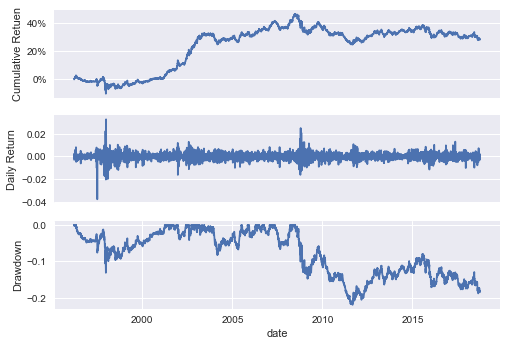

In [37]:
re_a4.figure_plot()

<h3>Cryptocurrency</h3>

In [38]:
Crypto_daily_category=['BTC','DASH','DOGE','LTC','MAID','XMR','XRP']

In [39]:
Crypto_daily = get_data.cryptocurrency()
data_dict=Crypto_daily.daily_price_historical(Crypto_daily_category)

In [40]:
for i in data_dict.keys():
    print(i,len(data_dict[i]))
    print(data_dict[i].index[0],data_dict[i].index[-1])

BTC 3003
2010-07-16 2018-10-04
DASH 1701
2014-02-07 2018-10-04
DOGE 1708
2014-01-31 2018-10-04
LTC 1808
2013-10-23 2018-10-04
MAID 1346
2015-01-28 2018-10-04
XMR 1346
2015-01-28 2018-10-04
XRP 1354
2015-01-20 2018-10-04


In [41]:
start_date=data_dict['MAID'].index[0]

In [42]:
for i in data_dict.keys():
    data_dict[i]=data_dict[i][data_dict[i].index>=start_date]

In [43]:
a=Crypto_daily_category[0]

In [44]:
for i in range(len(Crypto_daily_category)):
    index=Crypto_daily_category[i]
    data_dict[index]['date']=data_dict[index].index
    data_dict[index]['value']=data_dict[index].close
    data_dict[index].drop(['open','high','low','close'],axis=1,inplace=True)
    data_dict[index].reset_index(drop=True,inplace=True)

In [45]:
#if date is all the same
for j,k in itertools.combinations(range(len(Crypto_daily_category)),2):
    if(sum(data_dict[Crypto_daily_category[j]].date!=\
              data_dict[Crypto_daily_category[k]].date)>0):
        print('Dates of dataset '+Crypto_daily_category[j]+' and '+\
              Crypto_daily_category[k]+' are different')
date=data_dict[list(data_dict.keys())[0]].date

In [46]:
data_df=pd.DataFrame()
for i in range(len(Crypto_daily_category)):
    index=Crypto_daily_category[i]
    data_df[index]=data_dict[index].value
data_df.index=data_dict[index].date

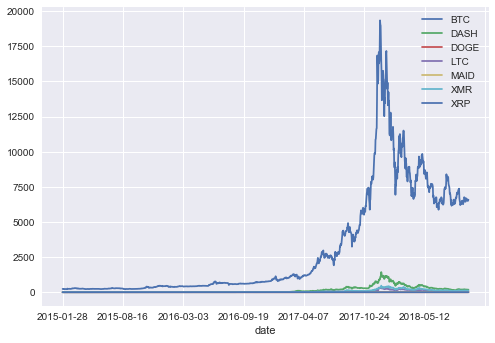

In [47]:
data_df.plot()

In [48]:
signal_class=generate_signals.signal_1(data_dict,period)

In [49]:
signal_class.get_signal()

In [50]:
signal_df=signal_class.signal_df

In [51]:
price_df=pd.DataFrame()
for index in Crypto_daily_category:
    price_df[index]=data_dict[index].value
price_df.set_index(date,inplace=True)
price_df=price_df.loc[signal_df.index]

In [52]:
#TS
position=signal_df/7    
return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)

In [53]:
re_a5=result_analysis.result_daily(daily_re)
re_a5.get_metrics()
print(re_a5.ar,re_a5.std,re_a5.sp,re_a5.mdd)

3.05780823747 0.520934992153 1.4738408924 -21.4865363589


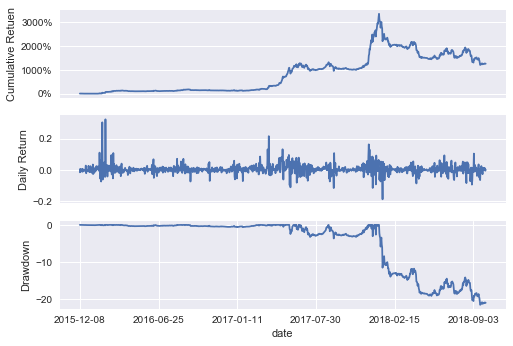

In [54]:
re_a5.figure_plot()

In [55]:
signal_L3=signal_df.apply(lambda x: x.where(x<x.nlargest(3)[2],60),axis=1)
signal_S3=signal_L3.apply(lambda x: x.where(x>x.nsmallest(3)[2],-60),axis=1)
signal_else=signal_S3.apply(lambda x:x.where(np.abs(x)>1,0),axis=1)
position=signal_else/360

return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)
daily_cum_re=(daily_re+1).cumprod()-1

In [56]:
re_a6=result_analysis.result_daily(daily_re)
re_a6.get_metrics()
print(re_a6.ar,re_a6.std,re_a6.sp,re_a6.mdd)

0.0357024150647 0.690295646096 0.475842784981 -1.31707918825


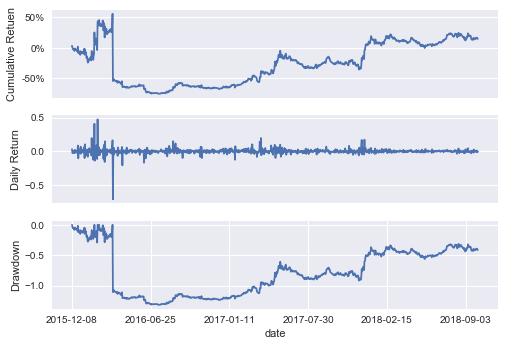

In [57]:
re_a6.figure_plot()